In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
import matplotlib.pyplot as plt

In [25]:
def load_data(path):
  x_train = pd.read_csv(path + "/X_train.csv")
  x_test = pd.read_csv(path + "/X_test.csv")
  y_train = pd.read_csv(path + "/y_train.csv")
  y_test = pd.read_csv(path + "/y_test.csv")
  return x_train, x_test, y_train, y_test

x_train, x_test, y_train, y_test = load_data("/content/Data")

In [26]:
x_train

,carID,brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize
0,13207,hyundi,Santa Fe,2019,Semi-Auto,4223,Diesel,145.0,39.8,2.2
1,17314,vauxhall,GTC,2015,Manual,47870,Diesel,125.0,60.1,2.0
2,12342,audi,RS4,2019,Automatic,5151,Petrol,145.0,29.1,2.9
3,13426,vw,Scirocco,2016,Automatic,20423,Diesel,30.0,57.6,2.0
4,16004,skoda,Scala,2020,Semi-Auto,3569,Petrol,145.0,47.1,1.0
...,...,...,...,...,...,...,...,...,...,...
4955,16898,merc,GL Class,2015,Automatic,24314,Diesel,125.0,56.6,2.1
4956,14416,bmw,6 Series,2017,Automatic,18000,Diesel,145.0,51.4,3.0
4957,15453,vw,CC,2015,Manual,84932,Diesel,30.0,60.1,2.0
4958,14666,audi,A7,2017,Semi-Auto,30150,Diesel,145.0,62.8,3.0


In [30]:
y_train

,carID,price
0,13207,31995
1,17314,7700
2,12342,58990
3,13426,12999
4,16004,16990
...,...,...
4955,16898,17999
4956,14416,28900
4957,15453,8998
4958,14666,23198


In [27]:
def OHE(x_train, x_test):
  train_len = len(x_train)
  x_data = x_train.append(x_test)
  labels = ['brand','model','transmission','fuelType']
  for i in labels:
    x_data= pd.get_dummies(x_data, prefix='', prefix_sep='', columns = [i], drop_first=True)
  x_train = x_data[:train_len]
  x_test = x_data[train_len:]
  return x_train, x_test

x_train, x_test = OHE(x_train, x_test)

In [28]:
x_train

,carID,year,mileage,tax,mpg,engineSize,bmw,ford,hyundi,merc,skoda,toyota,vauxhall,vw,7 Series,8 Series,A7,A8,Agila,Amarok,Antara,Arteon,Avensis,Beetle,CC,CLA Class,CLK,CLS Class,Caddy,Caddy Life,Caddy Maxi Life,California,Camry,Caravelle,Combo Life,Edge,Eos,Fusion,G Class,GL Class,...,RS3,RS4,RS5,RS6,Rapid,Roomster,S Class,S3,S4,SLK,SQ5,SQ7,Santa Fe,Scala,Scirocco,Shuttle,Supra,Tiguan Allspace,Tourneo Connect,Tourneo Custom,V Class,Verso,Vivaro,X-CLASS,X4,X6,X7,Yeti,Z3,Z4,Zafira Tourer,i3,i8,Manual,Other,Semi-Auto,Electric,Hybrid,Other,Petrol
0,13207,2019,4223,145.0,39.8,2.2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,17314,2015,47870,125.0,60.1,2.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,12342,2019,5151,145.0,29.1,2.9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,13426,2016,20423,30.0,57.6,2.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,16004,2020,3569,145.0,47.1,1.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4955,16898,2015,24314,125.0,56.6,2.1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4956,14416,2017,18000,145.0,51.4,3.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4957,15453,2015,84932,30.0,60.1,2.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4958,14666,2017,30150,145.0,62.8,3.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [7]:
def Scaler(data):
  scaler = MinMaxScaler()
  data = data.drop('carID', axis=1)
  scaled_data = scaler.fit_transform(data)
  scaled_data = pd.DataFrame(scaled_data, columns=data.columns)
  return scaled_data

scaled_x_train = Scaler(x_train)
scaled_x_test = Scaler(x_test)

y_test = y_test['price']
y_train = y_train['price']

In [12]:
scaled_x_test

,year,mileage,tax,mpg,engineSize,bmw,ford,hyundi,merc,skoda,toyota,vauxhall,vw,7 Series,8 Series,A7,A8,Agila,Amarok,Antara,Arteon,Avensis,Beetle,CC,CLA Class,CLK,CLS Class,Caddy,Caddy Life,Caddy Maxi Life,California,Camry,Caravelle,Combo Life,Edge,Eos,Fusion,G Class,GL Class,GLB Class,...,RS3,RS4,RS5,RS6,Rapid,Roomster,S Class,S3,S4,SLK,SQ5,SQ7,Santa Fe,Scala,Scirocco,Shuttle,Supra,Tiguan Allspace,Tourneo Connect,Tourneo Custom,V Class,Verso,Vivaro,X-CLASS,X4,X6,X7,Yeti,Z3,Z4,Zafira Tourer,i3,i8,Manual,Other,Semi-Auto,Electric,Hybrid,Other,Petrol
0,0.94,0.072103,0.258621,0.073504,0.476190,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.94,0.225569,0.448276,0.071368,0.476190,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.98,0.059855,0.250000,0.066667,0.476190,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.98,0.019491,0.250000,0.100000,0.158730,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.90,0.125595,0.560345,0.056838,0.634921,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2667,0.90,0.126301,0.560345,0.057479,0.634921,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2668,0.90,0.364980,0.275862,0.105769,0.476190,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2669,1.00,0.024603,0.250000,0.101709,0.158730,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2670,0.92,0.153993,0.344828,0.082692,0.317460,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [21]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(109, activation='relu'))
model.add(tf.keras.layers.Dense(300, activation='relu'))
model.add(tf.keras.layers.Dense(500, activation='relu'))
model.add(tf.keras.layers.Dense(200, activation='relu'))

model.add(tf.keras.layers.Dense(1, activation='relu'))

optimizer_Adam = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(optimizer=optimizer_Adam, loss='mae')
history = model.fit(x=scaled_x_train, y=y_train, epochs=30, validation_data=(scaled_x_test,y_test))

Epoch 1/30
155/155 [==============================] - 2s 9ms/step - loss: 13471.0596 - val_loss: 7247.1436
Epoch 2/30
155/155 [==============================] - 1s 8ms/step - loss: 5681.5669 - val_loss: 5104.3955
Epoch 3/30
155/155 [==============================] - 1s 8ms/step - loss: 3961.1882 - val_loss: 3626.4475
Epoch 4/30
155/155 [==============================] - 1s 9ms/step - loss: 3146.0723 - val_loss: 3208.2888
Epoch 5/30
155/155 [==============================] - 1s 9ms/step - loss: 2819.8359 - val_loss: 3086.8584
Epoch 6/30
155/155 [==============================] - 1s 9ms/step - loss: 2672.8474 - val_loss: 2938.4985
Epoch 7/30
155/155 [==============================] - 1s 9ms/step - loss: 2575.2324 - val_loss: 2973.6985
Epoch 8/30
155/155 [==============================] - 1s 9ms/step - loss: 2539.1685 - val_loss: 2981.7693
Epoch 9/30
155/155 [==============================] - 2s 12ms/step - loss: 2430.5996 - val_loss: 2774.8992
Epoch 10/30
155/155 [=======================

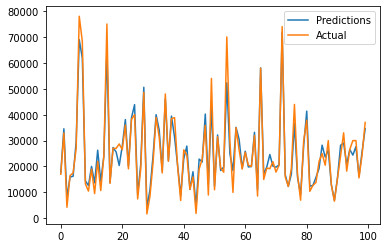

In [23]:
y_pred = model.predict(scaled_x_test)
plt.plot(y_pred[200:300], label='Predictions')
plt.plot(y_test[200:300].reset_index(drop=True), label='Actual')
plt.legend()
plt.show()

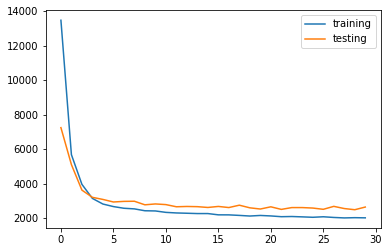

In [22]:
plt.plot(history.history['loss'], label='training')
plt.plot(history.history['val_loss'], label='testing')
plt.legend()